# Homework 5
Jeffrey Xu   
11/02/2020  
Professor Mortazavi

## Problem 1: Gradient Boosting

## Problem 2: Random Forest

**Classifying benign vs malignant tumors:** We would like to classify if a tumor is benign or malign based on its attributes. We use data from the Breast Cancer Wisconsin Data Set of the UCI Machine Learning Repository: *https://archive.ics.uci.edu/m1/datasets/breast+cancer+wisconsin+(original)*. The input file is named "hw5_question2.csv" for our experiments. The rows of these files refer to the data samples, while the columns denote the deatures (columns 1-9) and the outcome variable (column 10), as described bellow:

1. Clump Thickness: discrete values {1,10}  
2. Uniformity of Cell Size: discrete values {1,10}  
3. Uniformity of Cell Shape: discrete values {1,10}  
4. Marginal Adhesion: discrete values {1,10}  
5. Single Epithelial Cell Size: discrete values {1,10}  
6. Bare Nuclei: discrete values {1,10}
7. Bland Chromatin: discrete values {1,10}  
8. Normal Nucleoli: discrete values {1,10}  
9. Mitoses: discrete values {1,10}  
10. Class: 2 for benign, 4 for malignant (this is the **outcome** variable)

**(a)** Compute the number of samples belonging to the benign and the number of samples belonging to the malignant case. What do you observe? Are the two classes equally represented in the data? Separate the data into a train (2/3 of the data) and a test (1/3 of the data) set. Make sure that both classes are represented with the same proportion in both sets. 

In [56]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load data
data = pd.read_csv("hw5_question2.csv", header=None)

In [18]:
# Extract features and labels 
X = data.drop([9], axis=1)
y = data[9].replace(2,0).replace(4,1)

In [19]:
X

,0,1,2,3,4,5,6,7,8
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: 9, Length: 683, dtype: int64

Now we need to look at the distribution of bengin and malignant cases. We first display the amount that is in each class. 

In [21]:
# Output the number of benign and malignant cases
print(y.value_counts())

0    444
1    239
Name: 9, dtype: int64


We notice that these two classes aren't necessarily distributed equally. We see that there are almost double the amount of benign cases compared to the number of malignant cases. However, now we want to split our dataset into a third testing and two thirds training while keeping this class distribution consistent through both datasets. 

In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [23]:
print('Label distribution for training data:')
print(y_train.value_counts())
print()

print('Label distribution for testing data:')
print(y_test.value_counts())

Label distribution for training data:
0    302
1    155
Name: 9, dtype: int64

Label distribution for testing data:
0    142
1     84
Name: 9, dtype: int64


We notice by checking the split data, that the proportions of each class is about equal to the total proportions within the entire dataset. Therefore, we have properly analyzed and split the input data. Also, note that the sklearn *train_test_split* function defaults to straitify the dataset which gives equal proportions of each class. 

**(b)** *Implement* two decision trees using the training samples. The splitting criterion for the first one should be the entropy, while for the second one should be the gini index. Plot the 10-fold stratified cross validated accuracy on the train and test data while the maximum depth in the tree increases for both splitting criteria. Do you observe any differences in practice? 

In [24]:
# Imports
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [51]:
def Cross_Validate_Models(d):
    # Create splitter object
    n_folds = 10
    splitter = StratifiedKFold(n_splits=n_folds, shuffle=True).split(X_train, y_train)
    
    # Performance
    gini_perf = []
    entropy_perf = []
    gini_train = []
    entropy_train = []
    for i in max_depth:
        gini_perf.append([])
        entropy_perf.append([])
        gini_train.append([])
        entropy_train.append([])
    
    fold = 1
    
    # Cross Validation
    for train_index, test_index in splitter:
        # Split training data for CV
        X_train_CV, X_test_CV = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_CV, y_test_CV = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

        # Iterate through all different depths
        for d in max_depth:
            model_gini = DecisionTreeClassifier(criterion='gini', max_depth=d, 
                                                min_impurity_decrease=0.0, min_samples_split=2)
            model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=d, 
                                                   min_impurity_decrease=0.0, min_samples_split=2)
            model_gini.fit(X_train_CV, y_train_CV)
            model_entropy.fit(X_train_CV, y_train_CV)

            pred_gini = model_gini.predict(X_test_CV)
            pred_entropy = model_entropy.predict(X_test_CV)
            
            train_gini_pred = model_gini.predict(X_train_CV)
            train_entropy_pred = model_entropy.predict(X_train_CV)

            gini_perf[d - 1].append(roc_auc_score(y_test_CV, pred_gini))
            entropy_perf[d - 1].append(roc_auc_score(y_test_CV, pred_entropy))
            
            gini_train[d - 1].append(roc_auc_score(y_train_CV, train_gini_pred))
            entropy_train[d - 1].append(roc_auc_score(y_train_CV, train_entropy_pred))
        print('Fold ' + str(fold) + ' completed')
        fold += 1
    return gini_perf, entropy_perf, gini_train, entropy_train

In [69]:
# Max-depths
max_depth = [x for x in range(1, 11)]

# Compute CV
gini_perf, entropy_perf, gini_train, entropy_train = Cross_Validate_Models(max_depth)

Fold 1 completed
Fold 2 completed
Fold 3 completed
Fold 4 completed
Fold 5 completed
Fold 6 completed
Fold 7 completed
Fold 8 completed
Fold 9 completed
Fold 10 completed


In [48]:
# Plotting imports
import matplotlib.pyplot as plt

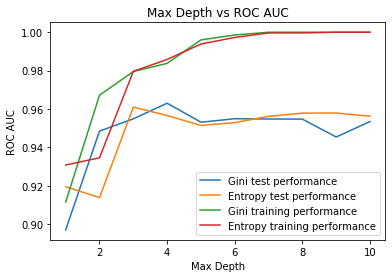

In [76]:
plt.plot(max_depth, np.mean(gini_perf, axis=1), label='Gini test performance')
plt.plot(max_depth, np.mean(entropy_perf, axis=1), label='Entropy test performance')
plt.plot(max_depth, np.mean(gini_train, axis=1), label='Gini training performance')
plt.plot(max_depth, np.mean(entropy_train, axis=1), label='Entropy training performance')
plt.title('Max Depth vs ROC AUC')
plt.xlabel('Max Depth')
plt.ylabel('ROC AUC')
plt.legend()
plt.show()

We notice that the Gini index and Entropy loss functions give around the same performance here. Both models have perfect training error after the max depth go to around a depth of 7 and both models level out at about 0.96 testing error. Due to the nature of this dataset, we see that after around a depth of 5 for each tree, the models basically begin to level out. This is probably because our classification is binary. With more classes, we could see that more layers in each decision tree is required. 

**(c)** *Feature Importance* Run a 10-fold stratified cross-validation for modeling this problem with a random forest model. You can choose to do a secondary 10-fold cross-validation on the training set in each fold to find the optimal number of trees and depth of each tree if you choose. Is this model more accurate (averaged over all 10 folds) than the decision trees? As ranked by the feature important, please provide a ranking of the features as their average position (standard deviation) of the rank order. Is this ranking it by Gini, Mean Decrease in Acccuracy, or something else? What should the final model's list of features be? Please justify your answer. 